<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/xornet_batch_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [1/1000], Loss: 0.6969
Epoch [101/1000], Loss: 0.0293
Epoch [201/1000], Loss: 0.0069
Epoch [301/1000], Loss: 0.0032
Epoch [401/1000], Loss: 0.0018
Epoch [501/1000], Loss: 0.0012
Epoch [601/1000], Loss: 0.0009
Epoch [701/1000], Loss: 0.0006
Epoch [801/1000], Loss: 0.0005
Epoch [901/1000], Loss: 0.0002
Predicted classes: tensor([-8.0058,  9.1980,  9.2053, -9.3570])
Actual classes: tensor([0., 1., 1., 0.])


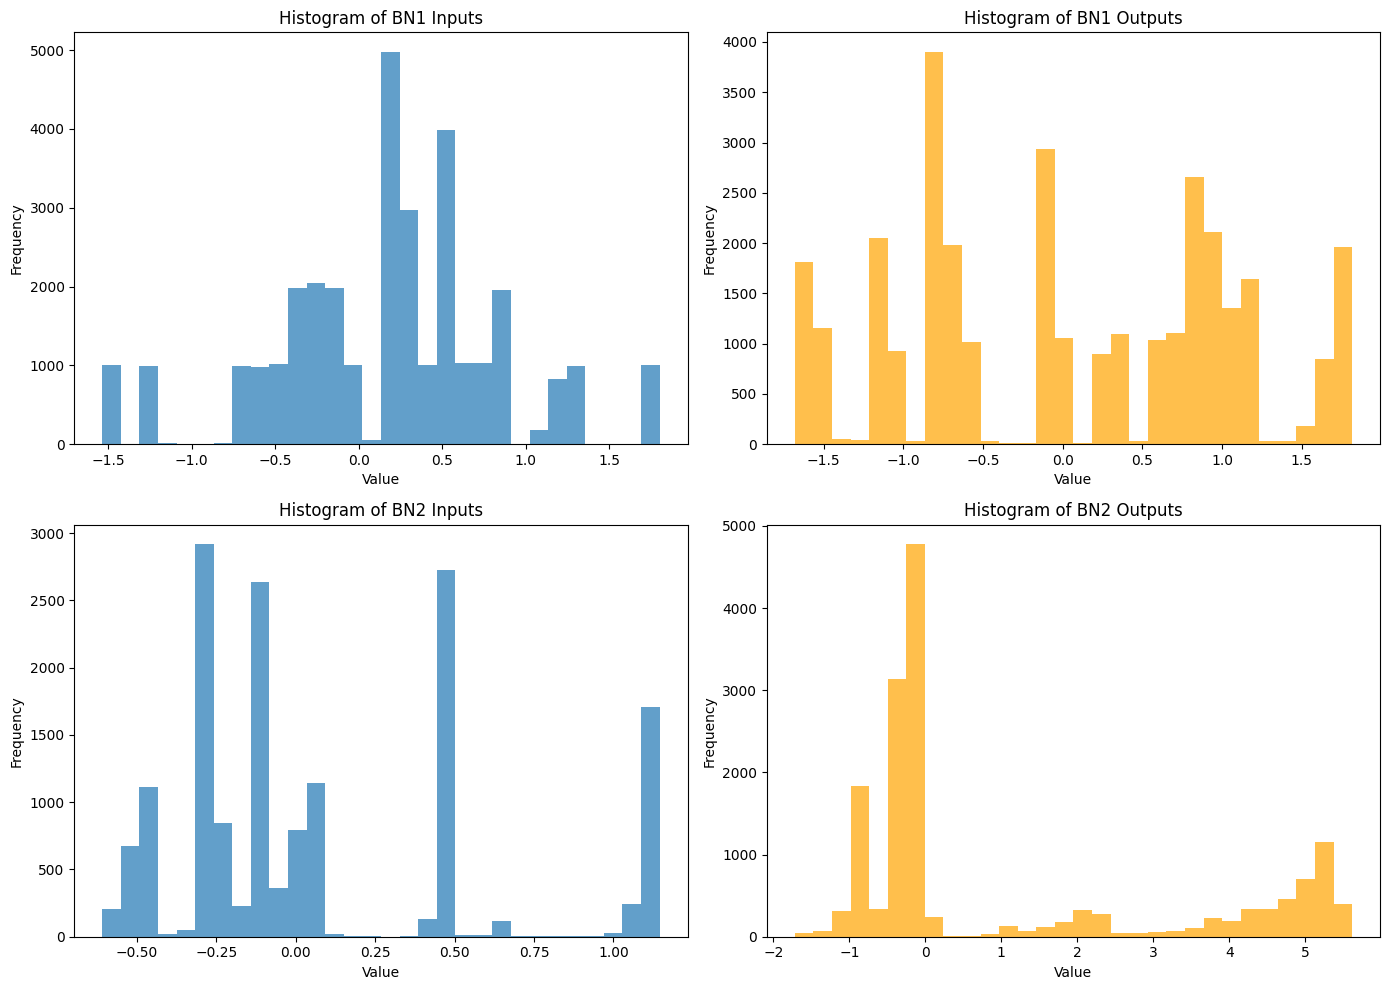

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the MLP model with batch normalization and statistics collection
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.fc1 = nn.Linear(2, 8)  # Input layer to first hidden layer
        self.bn1 = nn.BatchNorm1d(8)  # Batch normalization for the first hidden layer
        self.fc2 = nn.Linear(8, 4)  # First hidden layer to second hidden layer
        self.bn2 = nn.BatchNorm1d(4)  # Batch normalization for the second hidden layer
        self.fc3 = nn.Linear(4, 1)  # Second hidden layer to output layer

        # For storing BatchNorm statistics
        self.bn1_input = []
        self.bn1_output = []
        self.bn2_input = []
        self.bn2_output = []

    def forward(self, x):
        x1 = self.fc1(x)
        self.bn1_input.append(x1.detach().numpy())
        x1 = self.bn1(x1)
        self.bn1_output.append(x1.detach().numpy())
        x = torch.relu(x1)

        x2 = self.fc2(x)
        self.bn2_input.append(x2.detach().numpy())
        x2 = self.bn2(x2)
        self.bn2_output.append(x2.detach().numpy())
        x = torch.relu(x2)

        x = self.fc3(x).squeeze(1)
        return x

# Instantiate, train, and test the model as before
model = XORNet()
criterion = nn.BCEWithLogitsLoss()#nn.CrossEntropyLoss() uses two outputs
optimizer = optim.Adam(model.parameters(), lr=0.01)

X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
y = torch.tensor([0, 1, 1, 0], dtype=torch.float)#.unsqueeze(1)

for epoch in range(1000):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

with torch.no_grad():
    predicted = model(X)
    print(f'Predicted classes: {predicted}')
    print(f'Actual classes: {y}')

# Plot the BatchNorm statistics


In [5]:
B_out = np.array(model.bn1_output)
B_in = np.array(model.bn1_input)
idx = -1;
for neuron in range(B_in.shape):
  plt.hist(B_in[idx,:,neuron],label = f'Neuron {neuron} Input');
  plt.hist(B_out[idx,:,neuron],label = f'Neuron {neuron} Output');
  plt.show()

TypeError: 'tuple' object cannot be interpreted as an integer

In [3]:
np.array(model.bn1_input).shape

(1001, 4, 8)

In [ ]:
y = torch.tensor([0, 1, 1, 0], dtype=torch.float32).unsqueeze(1)

In [ ]:
output.squeeze(),y

(tensor([-9.1496,  0.6930,  0.6930,  0.6930], grad_fn=<SqueezeBackward0>),
 tensor([0., 1., 1., 0.]))

In [ ]:
criterion(output, y)

tensor(-0., grad_fn=<DivBackward1>)

In [ ]:
y

tensor([[0],
        [1],
        [1],
        [0]])

In [ ]:
output

tensor([[ 0.2187],
        [-0.2013],
        [-0.2303],
        [-0.6503]], grad_fn=<AddmmBackward0>)

In [ ]:
criterion?